In [124]:
recombinant_new_result = dict()
for _, row in pd.read_csv('trp_acc.csv').iterrows():
    recombinant_new_result[row['turns']] = [row['tpr'], row['accuracy_of_parental_lineages']]
recombinant_new_result

{'turns1': [0.6944444444444444, 0.54],
 'turns2': [0.7083333333333334, 0.4705882352941176],
 'turns3': [0.6944444444444444, 0.54],
 'turns4': [0.7083333333333334, 0.5294117647058824],
 'turns5': [0.6805555555555556, 0.4897959183673469],
 'turns6': [0.6666666666666666, 0.5]}

In [125]:
performance = pd.concat([pd.read_csv('Methods_detect_results.csv'),
                         pd.read_csv('performance.csv')])
performance = performance.loc[~((performance['turns'] == 'turns2') & (performance['method'] == 'recombinhunt'))]
for _, row in performance.iterrows():
    if row['method'] == 'recombinhunt':
        performance.loc[(performance['turns'] == row['turns']) & (performance['method'] == 'recombinhunt'), 'tpr'] = recombinant_new_result[row['turns']][0]
        performance.loc[(performance['turns'] == row['turns']) & (performance['method'] == 'recombinhunt'), 'accuracy_of_parental_lineages'] = recombinant_new_result[row['turns']][1]
performance

,turns,method,sample_size,tpr,time_microsecond,time_second,time_minute,time_hour,accuracy_of_parental_lineages,core
0,turns1,CovRecomb,72,0.402800,13248.474,13.25,0.22,0.00,0.965517241,1
1,turns1,rebar,72,0.791700,683986.911,683.99,11.40,0.19,0.824561404,1
2,turns1,3SEQ,72,0.569400,245756.853,245.76,4.10,0.07,0.926829268,1
3,turns1,VirusRecom,72,0.569400,8048528.483,8048.53,134.14,2.24,0.731707317,1
4,turns1,RIPPLES,72,1.000000,2507807.912,2507.81,41.80,0.70,na,2
5,turns2,CovRecomb,72,0.375000,12715.178,12.72,0.21,0.00,1,1
6,turns2,rebar,72,0.750000,615524.860,615.52,10.26,0.17,0.777777778,1
7,turns2,3SEQ,72,0.569400,249021.649,249.02,4.15,0.07,0.87804878,1
8,turns2,VirusRecom,72,0.569400,6787153.629,6787.15,113.12,1.89,0.634146341,1
9,turns2,RIPPLES,72,1.000000,2541483.311,2541.48,42.36,0.71,na,2


### 1c

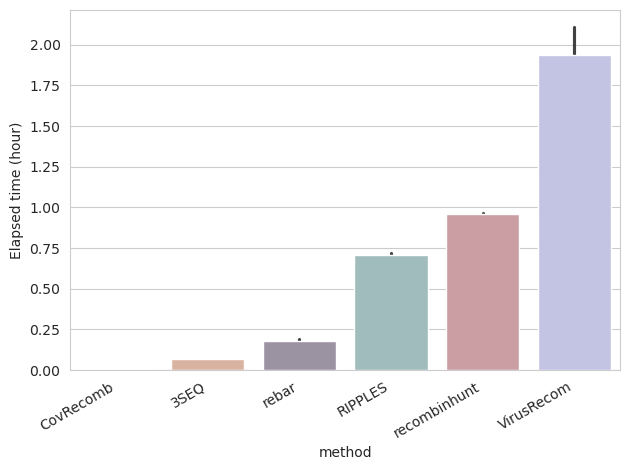

In [126]:
custom_order = ['CovRecomb', '3SEQ', 'rebar', 'RIPPLES', 'recombinhunt', 'VirusRecom']
custom_colors = ['#a6b4d6', '#e2ae99', '#9d91a4', '#9cc1c0', '#d1979e', '#bdbdea']
color_dict = dict(zip(custom_order, custom_colors))
num_methods = len(custom_order)

_, ax = plt.subplots()

ax.grid(axis='y', zorder=0)
sns.barplot(x='method', y='time_hour', hue='method', data=performance,
            errorbar='sd', palette=color_dict,
            order=custom_order, legend=False, ax=ax, zorder=3)

ax.set_ylabel('Elapsed time (hour)')

ax.set_xticks(np.arange(num_methods))
ax.set_xticklabels(custom_order, rotation=30, ha='right')

plt.tight_layout()
plt.savefig('../results/fig1c.pdf')
plt.show()

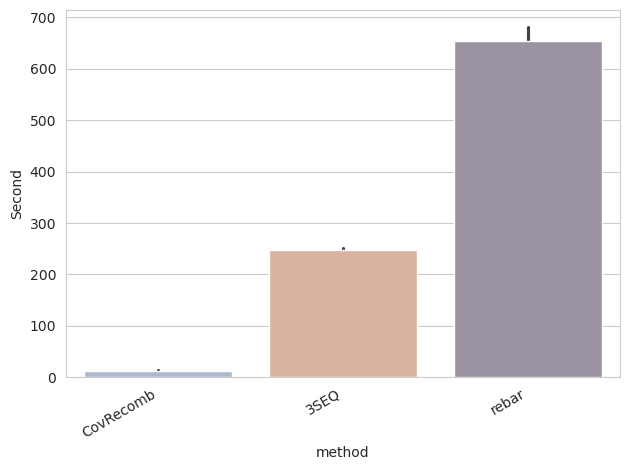

In [127]:
sub_performance = performance[performance['method'].isin(['CovRecomb', '3SEQ', 'rebar'])]

custom_order = ['CovRecomb', '3SEQ', 'rebar']
custom_colors = ['#a6b4d6', '#e2ae99', '#9d91a4']
color_dict = dict(zip(custom_order, custom_colors))
num_methods = len(custom_order)

_, ax = plt.subplots()

ax.grid(axis='y', zorder=0)
sns.barplot(x='method', y='time_second', hue='method', data=sub_performance,
            errorbar='sd', palette=color_dict,
            order=custom_order, legend=False, ax=ax, zorder=3)

ax.set_ylabel('Second')

ax.set_xticks(np.arange(num_methods))
ax.set_xticklabels(custom_order, rotation=30, ha='right')

plt.tight_layout()
plt.savefig('../results/fig1c_sub.pdf')
plt.show()

### 1e

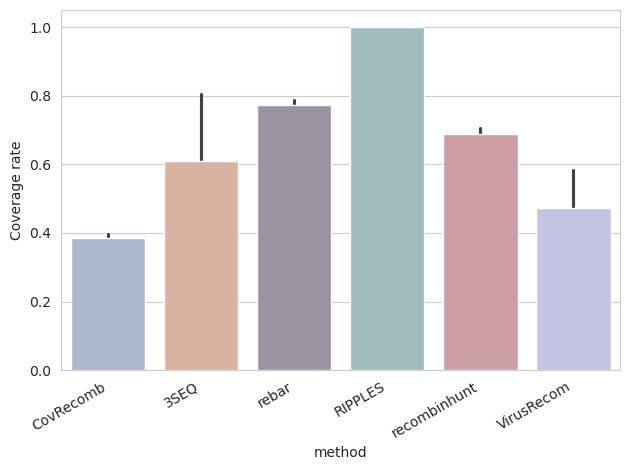

In [128]:
custom_order = ['CovRecomb', '3SEQ', 'rebar', 'RIPPLES', 'recombinhunt', 'VirusRecom']
custom_colors = ['#a6b4d6', '#e2ae99', '#9d91a4', '#9cc1c0', '#d1979e', '#bdbdea']
color_dict = dict(zip(custom_order, custom_colors))
num_methods = len(custom_order)

_, ax = plt.subplots()

ax.grid(axis='y', zorder=0)
sns.barplot(x='method', y='tpr', hue='method', data=performance,
            errorbar='sd', palette=color_dict,
            order=custom_order, legend=False, ax=ax, zorder=3)

ax.set_ylabel('Coverage rate')

num_methods = len(custom_order)
ax.set_xticks(np.arange(num_methods))
ax.set_xticklabels(custom_order, rotation=30, ha='right')

plt.tight_layout()
plt.savefig('../results/fig1e.pdf')
plt.show()

In [133]:
performance.groupby('method')['tpr'].mean()

method
3SEQ            0.611080
CovRecomb       0.386120
VirusRecom      0.472200
rebar           0.772240
recombinhunt    0.688889
Name: tpr, dtype: float64

In [134]:
performance.groupby('method')['tpr'].std()

method
3SEQ            0.193193
CovRecomb       0.011630
VirusRecom      0.111103
rebar           0.015848
recombinhunt    0.015836
Name: tpr, dtype: float64

### 1f

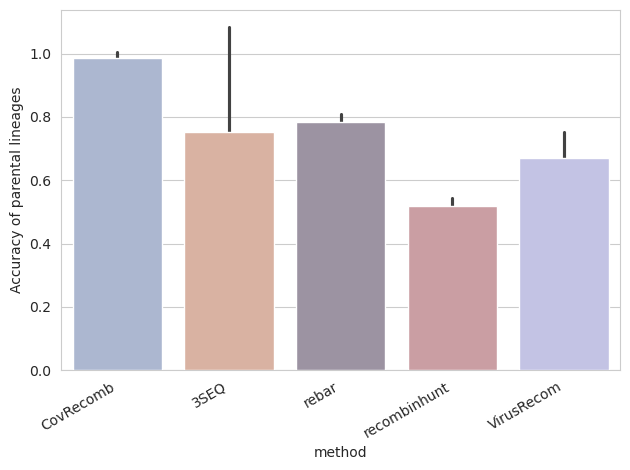

In [129]:
performance = performance[performance['method'] != 'RIPPLES'].copy()
performance['accuracy_of_parental_lineages'] = pd.to_numeric(performance['accuracy_of_parental_lineages'], errors='coerce')
custom_order = ['CovRecomb', '3SEQ', 'rebar', 'recombinhunt', 'VirusRecom']
custom_colors = ['#a6b4d6', '#e2ae99', '#9d91a4', '#d1979e', '#bdbdea']
color_dict = dict(zip(custom_order, custom_colors))

_, ax = plt.subplots()

ax.grid(axis='y', zorder=0)
sns.barplot(x='method', y='accuracy_of_parental_lineages', hue='method', data=performance,
            errorbar='sd', palette=color_dict,
            order=custom_order, legend=False, ax=ax, zorder=3)

ax.set_ylabel('Accuracy of parental lineages')

num_methods = len(custom_order)
ax.set_xticks(np.arange(num_methods))

ax.set_xticklabels(custom_order, rotation=30, ha='right')

plt.tight_layout()
plt.savefig('../results/fig1f.pdf')
plt.show()

In [130]:
performance.groupby('method')['accuracy_of_parental_lineages'].mean()

method
3SEQ            0.752539
CovRecomb       0.985961
VirusRecom      0.670193
rebar           0.783909
recombinhunt    0.519842
Name: accuracy_of_parental_lineages, dtype: float64

In [131]:
performance.groupby('method')['accuracy_of_parental_lineages'].std()

method
3SEQ            0.331111
CovRecomb       0.019229
VirusRecom      0.083121
rebar           0.024301
recombinhunt    0.023456
Name: accuracy_of_parental_lineages, dtype: float64

### 1d

In [132]:
speed = pd.concat([pd.read_csv('Methods_speed_results.csv'),
                   pd.read_csv('speed.csv', usecols=[
                       'turns', 'method', 'sample_size', 'tpr', 'time_microsecond','time_second', 'time_minute', 'time_hour', 'core'])])
speed

,turns,method,sample_size,tpr,time_microsecond,time_second,time_minute,time_hour,core
0,turns6,CovRecomb,72,0.402800,1.324847e+04,13.25,0.22,0.00,1
1,turns6,rebar,72,0.791700,6.839869e+05,683.99,11.40,0.19,1
2,turns6,3SEQ,72,0.569400,2.457569e+05,245.76,4.10,0.07,1
3,turns6,VirusRecom,72,0.569400,8.048528e+06,8048.53,134.14,2.24,1
4,turns6,RIPPLES,72,1.000000,2.507808e+06,2507.81,41.80,0.70,2
5,turns7,CovRecomb,144,0.375000,2.486928e+04,24.87,0.41,0.01,1
6,turns7,rebar,144,0.784700,1.156569e+06,1156.57,19.28,0.32,1
7,turns7,3SEQ,144,0.534700,2.755412e+06,2755.41,45.92,0.77,1
8,turns7,VirusRecom,144,0.888900,1.870622e+07,18706.22,311.77,5.20,1
9,turns7,RIPPLES,144,1.000000,4.893796e+06,4893.80,81.56,1.36,2


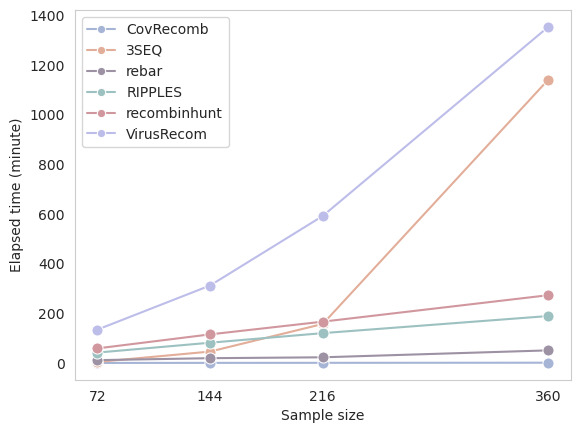

In [27]:
custom_order = ['CovRecomb', '3SEQ', 'rebar', 'RIPPLES', 'recombinhunt', 'VirusRecom']
custom_colors = ['#a6b4d6', '#e2ae99', '#9d91a4', '#9cc1c0', '#d1979e', '#bdbdea']
color_dict = dict(zip(custom_order, custom_colors))

for method in custom_order:
    sns.lineplot(x='sample_size', y='time_minute',
                 data=speed.loc[speed['method'] == method],
                 marker='o', label=method, color=color_dict[method])

plt.xlabel('Sample size')
plt.ylabel('Elapsed time (minute)')

plt.xticks([72, 144, 216, 360])
plt.legend()
plt.grid(False)
for line in plt.gca().lines:
    line.set_markersize(8)

plt.savefig('../results/fig1d.pdf')
plt.show()

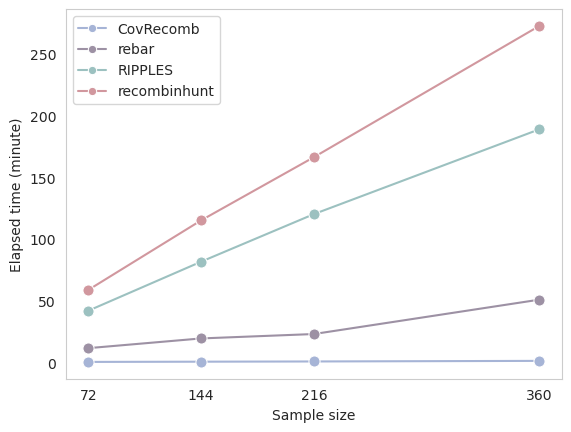

In [28]:
sub_speed = speed[speed['method'].isin(['CovRecomb', 'rebar', 'recombinhunt', 'RIPPLES'])]

custom_order = ['CovRecomb', 'rebar', 'RIPPLES', 'recombinhunt']
custom_colors = ['#a6b4d6', '#9d91a4', '#9cc1c0', '#d1979e']
color_dict = dict(zip(custom_order, custom_colors))

for method in custom_order:
    sns.lineplot(x='sample_size', y='time_minute',
                 data=sub_speed.loc[sub_speed['method'] == method],
                 marker='o', label=method, color=color_dict[method])

plt.xlabel('Sample size')
plt.ylabel('Elapsed time (minute)')

plt.xticks([72, 144, 216, 360])
plt.legend()
plt.grid(False)
for line in plt.gca().lines:
    line.set_markersize(8)

plt.savefig('../results/fig1d_sub.pdf')
plt.show()